# Activation Functions

### A simple visual showcase of what each activation function does.

## Tanh (Hyperbolic Tangent)

In [1]:
from dl_lib.activations import (
    tanh, tanh_prime, relu, relu_prime,
    leaky_relu, leaky_relu_prime
)
from demo_helper import plot_activation_function

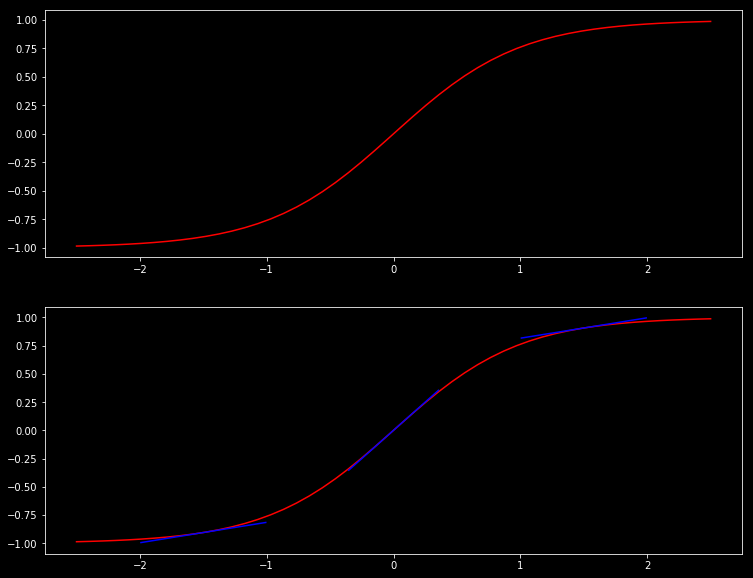

In [2]:
plot_activation_function(tanh, tanh_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])